In [1]:
import pandas as pd
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from src.simulate import make_detections, plot_detections, plot_cam_dets, in_footprint_2D

In [35]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [14]:
num_inds = 10
speed_var = 0.1
size=5

# area = [0,size,0,size]
timesteps = 1000

footprint = 1
cam_step = 0.3
y_steps=2

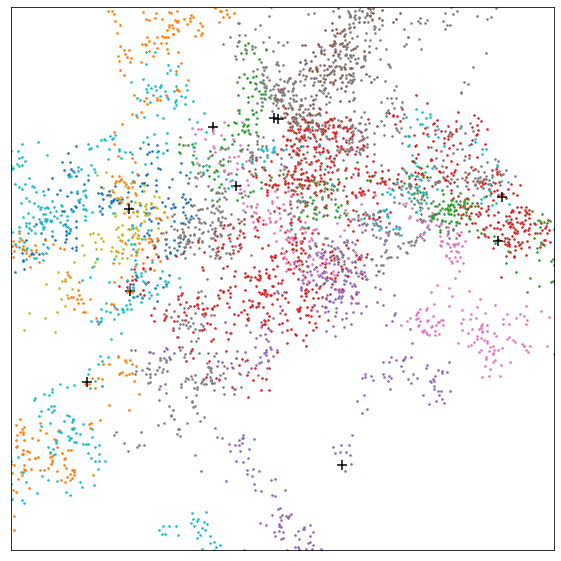

In [15]:
df = make_detections(num_inds, speed_var, size, timesteps)
fig = plot_detections(df, size, timesteps, stp=1)
# fig = plot_detections(df[["individual"] + ["x_{}".format(i) for i in range(51)]+ ["y_{}".format(i) for i in range(51)]], size, 50, stp=1)

In [7]:
fig.savefig("../figs/positions.png")
df.to_csv("../figs/positions.csv", index=False)

AttributeError: 'tuple' object has no attribute 'savefig'

Make vehicle track

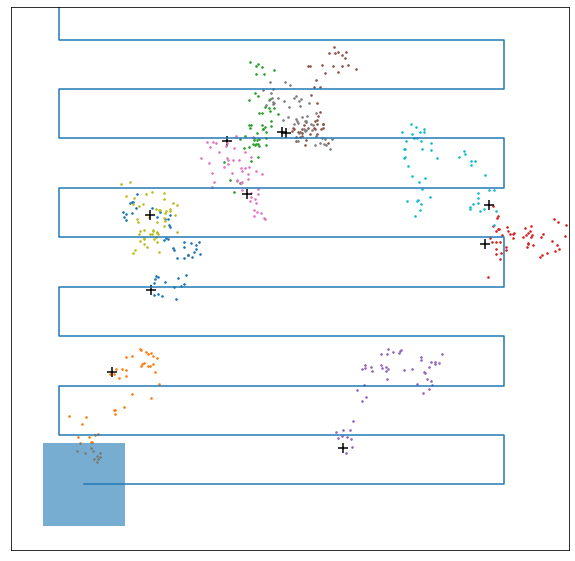

In [20]:
fig, ax, camx, camy = plot_cam_dets(df,size, footprint, cam_step, plot_less=50, y_steps=y_steps, stp=1)

In [9]:
fig.savefig("../figs/positions+track.png")

**Make detections figure**

Detections are where the individual is inside the camera at the given timestep

In [17]:
def check_in_cam(tstep, cx, cy, fprint, dfin):
    hfp = fprint/2
    cxt = camx[tstep]
    cyt = cy[tstep]
    return dfin[(dfin["x_{}".format(tstep)].between(cxt-hfp, cxt+hfp)) & (dfin["y_{}".format(tstep)].between(cyt-hfp, cyt+hfp))][["individual", "x_{}".format(tstep), "y_{}".format(tstep)]]
    
    

In [26]:
out = []

for i in range(len(camx)):
    cdf = check_in_cam(i, camx, camy, footprint, df)
    if len(cdf)!=0:
        for ind, row in cdf.iterrows():
            out.append(dict(time=i,
                            individual=row["individual"],
                            x=row["x_{}".format(i)],
                            y=row["y_{}".format(i)],
                            camera_x=camx[i],
                            camera_y=camy[i]
                            ))
            
incam = pd.DataFrame(out)

In [27]:
incam

,time,individual,x,y,camera_x,camera_y
0,35,1.0,0.099628,0.518748,3.000000e-01,0.6
1,36,1.0,0.087108,0.438028,3.330669e-16,0.6
2,37,1.0,0.009065,0.377100,-3.000000e-01,0.6
3,38,1.0,-0.086984,0.406482,-3.000000e-01,0.9
4,53,4.0,4.351764,1.258594,3.900000e+00,1.2
5,54,4.0,4.246477,1.256606,4.200000e+00,1.2
6,55,4.0,4.168036,1.315933,4.500000e+00,1.2
7,62,4.0,3.825732,1.595677,4.200000e+00,1.8
8,63,4.0,3.922457,1.635549,3.900000e+00,1.8
9,64,4.0,3.930726,1.790832,3.600000e+00,1.8


/home/nader/Projects/thesis/benthic_targets/venv/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


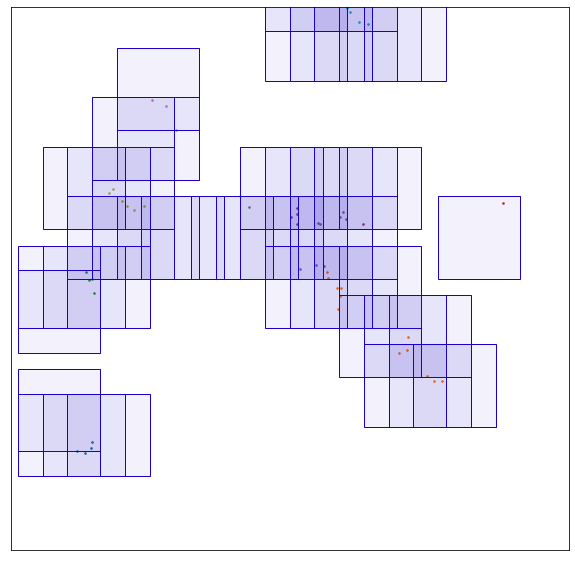

In [53]:
fig, ax = plt.subplots(figsize=(10,10))
    

for t in incam["time"].unique():
    
    tdf =incam[incam["time"]==t]
    
    ax.add_patch(Rectangle((tdf["camera_x"].to_numpy()[0] - 0.5 * footprint, tdf["camera_y"].to_numpy()[0] - 0.5 * footprint), footprint, footprint, 
                           facecolor=(0.1, 0, .8, 0.05), 
                           edgecolor=(0.1, 0, .8, 1.0)))
    
for ind in incam["individual"].unique():
    
    idf = incam[incam["individual"]==ind]
    ax.scatter(idf["x"], idf[["y"]], marker='.', s=10)




    
ax.set_xticks([])
ax.set_yticks([])
ax.axis('equal')
ax.axis(xmin=0 - 0.8, xmax=size + .8, ymin=0 - .8, ymax=size + 0.8)

fig.show()

In [45]:
ax.get_facecolor()

(1.0, 1.0, 1.0, 1.0)

In [54]:
fig.savefig("../figs/detections+cam.png")